<a href="https://colab.research.google.com/github/VISHNUCHARAN27/DEEP-LEARNING/blob/master/malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnu2799","key":"a3470c3a592aa9d771d440897bc95080"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 66 Feb 14 07:07 kaggle.json
{"username":"vishnu2799","key":"a3470c3a592aa9d771d440897bc95080"}

In [0]:
!pip install -q kaggle
!pip install -q kaggle-cli

    100% |████████████████████████████████| 81kB 5.2MB/s 
    100% |████████████████████████████████| 5.3MB 5.9MB/s 
    100% |████████████████████████████████| 92kB 24.7MB/s 
    100% |████████████████████████████████| 51kB 18.6MB/s 


# **DOWNLOAD DATSETS**

In [0]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 335M/337M [00:05<00:00, 66.3MB/s]
100% 337M/337M [00:05<00:00, 64.7MB/s]


In [0]:
!unzip cell-images-for-detecting-malaria

In [0]:
%ls

cell_images/  cell-images-for-detecting-malaria.zip  kaggle.json  sample_data/


## **CHECK THE IMAGE IN DATASET**

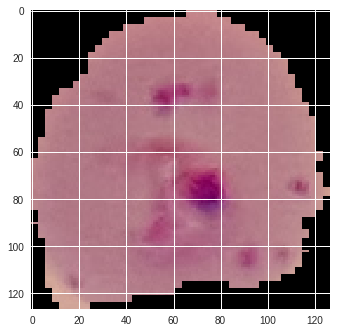

In [0]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


datadir='cell_images'
categories=['Parasitized','Uninfected']

for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
    plt.show()
    break
  break
  

In [0]:
img_size=120


In [0]:
import pickle
def dump_pickle(X,y,valid_img_count,pickle_counter,category):
  
  X=np.array(X).reshape(-1,img_size,img_size,3)
  
  pickle_out=open(os.path.join(datadir,'X_{}_{}'.format(category,pickle_counter) ),"wb" )
  pickle.dump(X,pickle_out)
  pickle_out.close
  print('X_{}_{} Generated\n'.format(category,pickle_counter))
  X=[]
  
  pickle_out=open(os.path.join(datadir,'y_{}_{}'.format(category,pickle_counter) ),"wb" )
  pickle.dump(y,pickle_out)
  pickle_out.close
  print('y_{}_{} Generated\n'.format(category,pickle_counter))
                  
                  

In [0]:
from tqdm import tqdm 
import pickle


def create_training_data():
  X=[]
  y=[]
  valid_img_count=0
  invalid_images=0
  count=0
  for category in categories:
    path=os.path.join(datadir,category)
    class_num=categories.index(category)
    pickle_counter=0
    
    for img in tqdm(os.listdir(path),desc=category):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        new_array=cv2.resize(img_array2,(img_size,img_size))
        new_array=new_array/255.0
        
        X.append(new_array)
        y.append(class_num)
        
        count+=1
        valid_img_count+=1
  
        
        if count>=2500:
          dump_pickle(X,y,valid_img_count,pickle_counter,category)
          count=0
          pickle_counter+=1
          X=[]
          y=[]
          
      
      except Exception as e:
        invalid_images+=1
        pass
        
    if pickle_counter==5 and count<2500 and category=='Parasitized':
      dump_pickle(X,y,valid_img_count,pickle_counter,category)
      count=0
      X=[]
      y=[]
      
        
    if pickle_counter==5 and count<2500 and category=='Uninfected' :
      dump_pickle(X,y,valid_img_count,pickle_counter,category)
      count=0
      X=[]
      y=[]
  
  
  return pickle_counter

b=create_training_data()

Parasitized:  18%|█▊        | 2470/13780 [00:03<00:16, 673.08it/s]

X_Parasitized_0 Generated

y_Parasitized_0 Generated



Parasitized:  36%|███▌      | 4955/13780 [00:16<00:08, 1040.90it/s]

X_Parasitized_1 Generated

y_Parasitized_1 Generated



Parasitized:  54%|█████▎    | 7398/13780 [00:40<00:06, 1056.94it/s]

X_Parasitized_2 Generated

y_Parasitized_2 Generated



Parasitized:  72%|███████▏  | 9900/13780 [01:10<00:11, 345.15it/s]

X_Parasitized_3 Generated

y_Parasitized_3 Generated



Parasitized:  90%|█████████ | 12424/13780 [01:40<00:01, 969.95it/s]

X_Parasitized_4 Generated

y_Parasitized_4 Generated



Uninfected:   0%|          | 0/13780 [00:00<?, ?it/s]

X_Parasitized_5 Generated

y_Parasitized_5 Generated



Uninfected:  18%|█▊        | 2477/13780 [00:30<00:20, 539.88it/s]

X_Uninfected_0 Generated

y_Uninfected_0 Generated



Uninfected:  36%|███▌      | 4974/13780 [00:42<00:13, 649.58it/s]

X_Uninfected_1 Generated

y_Uninfected_1 Generated



Uninfected:  54%|█████▍    | 7485/13780 [01:20<00:07, 836.60it/s]

X_Uninfected_2 Generated

y_Uninfected_2 Generated



Uninfected:  72%|███████▏  | 9948/13780 [01:50<00:04, 869.56it/s]

X_Uninfected_3 Generated

y_Uninfected_3 Generated



Uninfected:  90%|████████▉ | 12397/13780 [02:20<00:01, 869.96it/s]

X_Uninfected_4 Generated

y_Uninfected_4 Generated



Uninfected: 100%|██████████| 13780/13780 [02:34<00:00, 89.06it/s] 


X_Uninfected_5 Generated

y_Uninfected_5 Generated



In [0]:
%ls cell_images

Parasitized/     X_Parasitized_5  y_Parasitized_0  y_Uninfected_1
Uninfected/      X_Uninfected_0   y_Parasitized_1  y_Uninfected_2
X_Parasitized_0  X_Uninfected_1   y_Parasitized_2  y_Uninfected_3
X_Parasitized_1  X_Uninfected_2   y_Parasitized_3  y_Uninfected_4
X_Parasitized_2  X_Uninfected_3   y_Parasitized_4  y_Uninfected_5
X_Parasitized_3  X_Uninfected_4   y_Parasitized_5
X_Parasitized_4  X_Uninfected_5   y_Uninfected_0


In [0]:
import random 
import pickle
import os
import numpy as np

for i in range(b+1):
  
  print('--------------------------------------\n ')
  print('Processing-part{}'.format(i))
  
  pickle_in=open(os.path.join(datadir,'X_{}_{}'.format(categories[0],i)) ,'rb')
  Xpara=pickle.load(pickle_in)
  pickle_in.close
  
  pickle_in=open(os.path.join(datadir,'X_{}_{}'.format(categories[1],i)) ,'rb')
  Xuninf=pickle.load(pickle_in)
  pickle_in.close
  
  pickle_in=open(os.path.join(datadir,'y_{}_{}'.format(categories[0],i)) ,'rb')
  ypara=pickle.load(pickle_in)
  pickle_in.close
  
  pickle_in=open(os.path.join(datadir,'y_{}_{}'.format(categories[1],i)) ,'rb')
  yuninf=pickle.load(pickle_in)
  pickle_in.close
  
  X=np.concatenate((Xpara,Xuninf),axis=0)  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html
  y=np.concatenate((ypara,yuninf),axis=0)  
  
  print('\nConcatenated successfully-{}'.format(i))
  
  BSHUFFLE=[]
  
  x=0
  for label in y:
    BSHUFFLE.append([X[x],label])
    x+=1
    
  random.shuffle(BSHUFFLE)
  print("\nShuffled Successfully-{}".format(i))
  
  X=[]
  y=[]
  for item in BSHUFFLE:
    X.append(item[0])
    y.append(item[1])
    
  X=np.array(X).reshape(-1,img_size,img_size,3)

  pickle_out=open(os.path.join(datadir,'X_{}'.format(i)),'wb')
  pickle.dump(X,pickle_out)
  pickle_out.close
  
  pickle_out=open(os.path.join(datadir,'y_{}'.format(i)),'wb')
  pickle.dump(y,pickle_out)
  pickle_out.close
  
  print("\nSaved sucessfully-{}".format(i))
  
  
  
  
  
  
  
  

--------------------------------------
 
Processing-part0

Concatenated successfully-0

Shuffled Successfully-0

Saved sucessfully-0
--------------------------------------
 
Processing-part1

Concatenated successfully-1

Shuffled Successfully-1

Saved sucessfully-1
--------------------------------------
 
Processing-part2

Concatenated successfully-2

Shuffled Successfully-2

Saved sucessfully-2
--------------------------------------
 
Processing-part3

Concatenated successfully-3

Shuffled Successfully-3

Saved sucessfully-3
--------------------------------------
 
Processing-part4

Concatenated successfully-4

Shuffled Successfully-4

Saved sucessfully-4
--------------------------------------
 
Processing-part5

Concatenated successfully-5

Shuffled Successfully-5

Saved sucessfully-5


In [0]:
print(b)

5


In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Activation,MaxPooling2D,Dropout,Conv2D,Flatten
from tensorflow.keras.models import Sequential

model=Sequential()

model.add(Conv2D (64,(3,3),input_shape=(120,120,3))   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D (64,(3,3))   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D (64,(3,3))   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D (64,(3,3))   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

epochs=10

for epoch in range(epochs):
  print("EPOCHS-{}".format(epoch))
  for i in range(b+1):
    X=pickle.load(open(os.path.join (datadir,'X_{}'.format(i) ),'rb' ))
    y=pickle.load(open(os.path.join(datadir,'y_{}'.format(i) ),'rb' ))
    
    model.fit(X,np.array(y),batch_size=32,epochs=1,validation_split=0.1)
    model.save("Malaria.model")


EPOCHS-0
Train on 4500 samples, validate on 500 samples
Instructions for updating:
Use tf.cast instead.
4500/4500 [==============================] - 227s 50ms/sample - loss: 0.6183 - acc: 0.6320 - val_loss: 0.4155 - val_acc: 0.8160
Train on 4500 samples, validate on 500 samples
4500/4500 [==============================] - 229s 51ms/sample - loss: 0.2808 - acc: 0.9047 - val_loss: 0.2035 - val_acc: 0.9500
Train on 4500 samples, validate on 500 samples
4500/4500 [==============================] - 225s 50ms/sample - loss: 0.2108 - acc: 0.9376 - val_loss: 0.2509 - val_acc: 0.9240
Train on 4500 samples, validate on 500 samples
4500/4500 [==============================] - 229s 51ms/sample - loss: 0.2032 - acc: 0.9416 - val_loss: 0.1423 - val_acc: 0.9480
Train on 4500 samples, validate on 500 samples
4500/4500 [==============================] - 226s 50ms/sample - loss: 0.1661 - acc: 0.9496 - val_loss: 0.1832 - val_acc: 0.9440
Train on 2302 samples, validate on 256 samples
2302/2302 [==========

In [0]:
from google.colab import files
files.download("Malaria.model")

In [0]:
import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model("Malaria.model")
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 118, 118, 64)      1792      
_________________________________________________________________
activation_5 (Activation)    (None, 118, 118, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 57, 57, 64)        36928     
_________________________________________________________________
activation_6 (Activation)    (None, 57, 57, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 64)        36928     
__________

In [0]:
import cv2
import tensorflow as tf

def prepare(filepath):
  img_size=120
  a=cv2.imread(filepath)
  a1=cv2.resize(a,(img_size,img_size),interpolation = cv2.INTER_AREA)
  return a1.reshape(-1,img_size,img_size,3)

prediction=model.predict( [  prepare('cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png' )  ]   )
print(categories  [  int (prediction[0][0])   ]  )


Uninfected
